In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(10027, 32)
(10027, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL is swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 21] == 1)[0]
X_relative_footsteps_continuous_absolute_FL_swinging = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_FL_swinging = Y_relative_footsteps_continuous_absolute[idxs]

## Predict FL foot -> x

### Linear Regression

In [28]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FL_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9981979678474879
RMSE:  0.0033786747027432537
The lowest error is:  1.038792936031152e-06
The highest error is:  0.02608955708691814
The avg. error is:  0.0023205841877485915


In [29]:
model_fl_relative_support_x.coef_

array([[ 0.3128645 ,  0.03854193,  0.06476222, -0.12521594, -0.02748448,
         0.02078511, -0.00565055, -0.01748714, -0.06027348, -0.48875333,
        -0.03628026,  0.13002127, -0.186551  ,  0.07204461, -0.09984394,
         0.03203002, -0.0295187 ]])

In [30]:
model_fl_relative_support_x.intercept_

array([0.09315323])

Text(0, 0.5, 'Predictions')

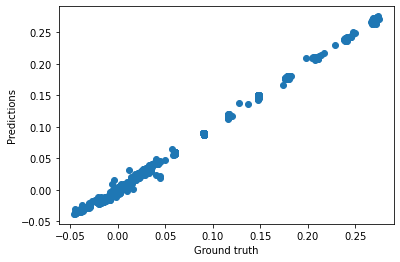

In [31]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [32]:
#%store model_fl_relative_support_x

In [33]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [34]:
# Save model
#joblib.dump(model_fl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_x.sav")

### Predict FL foot -> y

In [44]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FL_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9965115082673704
RMSE:  0.0037667998396959446
The lowest error is:  5.4393630816301775e-06
The highest error is:  0.02462789543935391
The avg. error is:  0.002635538128393889


In [45]:
model_fl_relative_support_y.coef_

array([[ 0.00788368,  0.34168152,  0.08299261,  0.01703037, -0.13684924,
         0.16085338,  0.00797252, -0.04573592, -0.08847974,  0.08675361,
        -0.58730763, -0.0840307 ,  0.00871576, -0.08967907, -0.06865873,
        -0.0795744 , -0.0317027 ]])

In [46]:
model_fl_relative_support_y.intercept_

array([0.06396557])

Text(0, 0.5, 'Predictions')

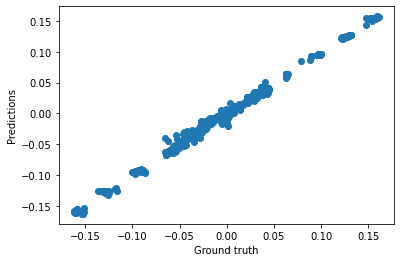

In [47]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [31]:
#%store model_fl_relative_support_y

In [32]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [25]:
# Save model
#joblib.dump(model_fl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_y.sav")